# Linear Regression Demo - Large Dataset

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
%matplotlib inline
os.getcwd()

'/Users/Edureka/Python'

## Import Dataset

In [2]:
cars=pd.read_csv('../cars.csv')

## Exploratory Data Analysis

In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [4]:
cars.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


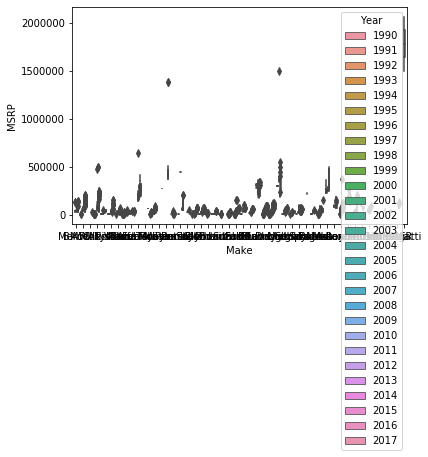

In [5]:
sns.boxplot(x='Make',y='MSRP',hue='Year',data=cars)

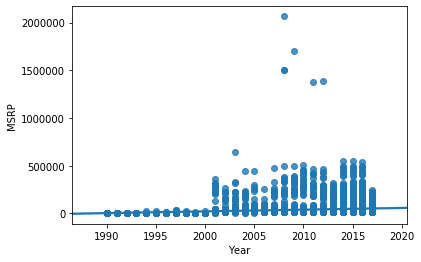

In [6]:
sns.regplot(x='Year',y='MSRP',data=cars)
plt.show()

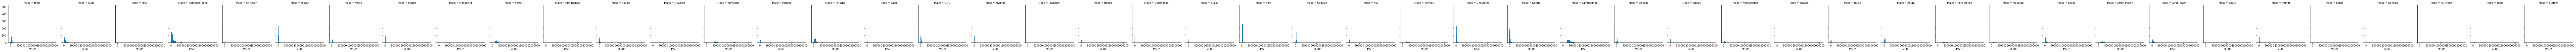

In [7]:
fig=sns.FacetGrid(cars,col='Make')
fig.map(plt.hist,'MSRP')

In [8]:
null_list=cars.isnull().sum()
#cars.columns[cars.isnull().any()]
null_cols=cars.columns[null_list>0]
cars[null_cols].dtypes

Engine Fuel Type     object
Engine HP           float64
Engine Cylinders    float64
Number of Doors     float64
Market Category      object
dtype: object

## Impute Null Values using Simple Imputer

In [3]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
cols=cars.columns
cars.iloc[:,[3,4,5,8,9]]=imputer.fit_transform(cars.iloc[:,[3,4,5,8,9]])
cars.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

## Convert Categorical Columns to Numeric

### Get Dummies 

In [10]:
processed_data=pd.get_dummies(cars)

### Label Encoder

In [ ]:
le=LabelEncoder()
qualitative=[c for c in cars.columns if cars.dtypes[c]=='object']
le_sex=LabelEncoder()
le_smoker=LabelEncoder()
le_region=LabelEncoder()
insurance[qualitative[0]]=le_sex.fit_transform(insurance[qualitative[0]])
insurance[qualitative[1]]=le_sex.fit_transform(insurance[qualitative[1]])
insurance[qualitative[2]]=le_sex.fit_transform(insurance[qualitative[2]])
insurance.head()

In [4]:
def encoder(df):
    for i in range(len(df)):
        print(i)
        le=LabelEncoder()
        #df[cat_var[i]]=le.fit_transform(df[cat_var[i]])
        df[i]=le.fit_transform(df[i])
        print('after df')
    #return 

In [ ]:
qualitative=[c for c in cars.columns if cars.dtypes[c]=='object']
#cars[qualitative].apply(encoder)
#df.apply(lambda x: d[x.name].transform(x))
cars[qualitative]=cars[qualitative].apply(lambda x: LabelEncoder().fit_transform(x))


In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null int64
Model                11914 non-null int64
Year                 11914 non-null int64
Engine Fuel Type     11914 non-null int64
Engine HP            11914 non-null float64
Engine Cylinders     11914 non-null float64
Transmission Type    11914 non-null int64
Driven_Wheels        11914 non-null int64
Number of Doors      11914 non-null float64
Market Category      11914 non-null int64
Vehicle Size         11914 non-null int64
Vehicle Style        11914 non-null int64
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(13)
memory usage: 1.5 MB


In [16]:
cars.Make.unique()
#cars.Model.unique()

array([ 4,  3, 12, 31, 10, 33, 47, 29, 32, 13,  1, 45, 30, 28, 36, 37, 39,
       15, 19, 35, 18, 34, 43, 14,  8, 21,  5,  9, 11, 22, 25, 42, 46, 41,
        7,  0, 38, 27, 24,  2, 23, 26, 20, 40, 16, 17, 44,  6])

# cars_to_encode.info()

In [11]:
cars.describe()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,23.227463,460.337082,2010.384338,7.992782,249.100050,5.624727,1.450646,1.770186,3.436377,28.607437,0.967181,8.355212,26.637485,19.733255,1554.911197,4.059474e+04
std,14.545781,269.285747,7.579740,1.798163,108.939672,1.780189,0.924656,1.066762,0.881184,27.438468,0.875157,4.915271,8.863001,8.987798,1441.855347,6.010910e+04
min,0.000000,0.000000,1990.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,10.000000,219.000000,2007.000000,8.000000,170.000000,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,20.000000,457.000000,2015.000000,9.000000,225.000000,6.000000,1.000000,2.000000,4.000000,26.000000,1.000000,8.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,36.000000,711.000000,2016.000000,9.000000,300.000000,6.000000,2.000000,3.000000,4.000000,60.000000,2.000000,14.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,47.000000,914.000000,2017.000000,9.000000,1001.000000,16.000000,4.000000,3.000000,4.000000,70.000000,2.000000,15.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Split the target and predictors to y and x variables

In [20]:
# This has to run after Scaling function is done. 

target=scaled_df['MSRP']
features=scaled_df.drop('MSRP',axis=1)

### Scaler  - Standard Scaler used here to scale the data

In [18]:
# This has to run before spliting target and features
scaler=StandardScaler()
x=scaler.fit_transform(cars)
scaled_df=pd.DataFrame(x,columns=cars.columns)

### Split the processed dataset into train and test datasets

In [21]:

xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.30)

In [22]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((8339, 15), (8339,), (3575, 15), (3575,))

## Instantiate Linear Regression Model

In [23]:
lm=LinearRegression()

### Create the Linear Regression Model

In [44]:
model=lm.fit(xtrain,ytrain)
print('R Squared Value : ',model1.score(xtrain,ytrain))
print('Coefficient/Slope/M Value :',model1.coef_)
print('Intercept Value :',model1.intercept_)

R Squared Value :  0.49175477108492976
Coefficient/Slope/M Value : [ 0.01886565 -0.04120837  0.0112393   0.03208814  0.59454913  0.21855848
 -0.06150357 -0.04304669 -0.08109997 -0.07425239 -0.10909755  0.01310029
  0.11032839  0.08306674 -0.07916074]
Intercept Value : 0.0015422240046553746


## Predict the model with test dataset

In [25]:
result=model.predict(xtest)

## Check Accuracy for the model

In [26]:
mse=mean_squared_error(result, ytest)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(ytest,result))

0.7213541530583613
0.4750981102816364


## Without Scaler

In [28]:
test=cars['MSRP']
train=cars.drop('MSRP',axis=1)

In [29]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(train,test,test_size=0.3,random_state=3)

In [30]:
xtrain1.shape,ytrain1.shape

((8339, 15), (8339,))

In [43]:
model1=lm.fit(xtrain1,ytrain1)
print('R Squared Value : ',model1.score(xtrain,ytrain))
print('Coefficient/Slope/M Value :',model1.coef_)
print('Intercept Value :',model1.intercept_)

R Squared Value :  -15760653429.151995
Coefficient/Slope/M Value : [ 1.07244058e+02 -8.58302262e+00 -1.00272418e+02  1.04528720e+03
  3.46660893e+02  6.96153559e+03 -4.90483545e+03 -3.25030318e+03
 -5.56565595e+03 -1.65827495e+02 -8.05811953e+03  2.04544799e+02
  7.82655668e+02  6.10551770e+02 -3.35051080e+00]
Intercept Value : 125168.21807345445


In [45]:
result1=model.predict(xtest1)


In [46]:
mse1=mean_squared_error(result1, ytest1)
rmse1 = np.sqrt(mse1)
print(rmse1)
print(r2_score(ytest1,result1))

64451.56098854801
-0.6415004719072006


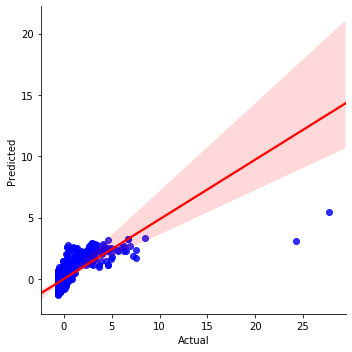

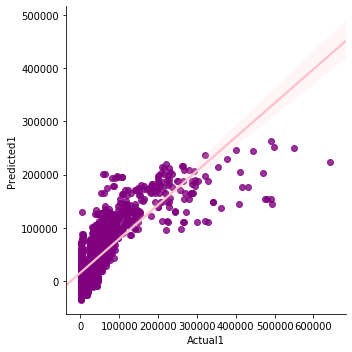

In [38]:
df=pd.DataFrame({'Actual':ytest,'Predicted':result})

df1=pd.DataFrame({'Actual1':ytest1,'Predicted1':result1})
sns.lmplot(x='Actual',y='Predicted',data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.lmplot(x='Actual1',y='Predicted1',data=df1,scatter_kws={"color": "purple"}, line_kws={"color": "pink"})